In [ ]:
!pip install langdetect
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

In [ ]:

import numpy as np
import pandas as pd

# Plotting and visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_formats = ['svg']
import seaborn as sns

# Used to draw a progress bar for longer method calls
from tqdm import tqdm

# Used to detect language used in each document
from langdetect import detect
from langdetect import DetectorFactory
DetectorFactory.seed = 0

# Pre-trained natural language processing pipeline for biomedical use
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

# Used to import list of punctuations
import string

# Feature extraction (text vectorizers)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Clustering and evaluation
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# Topic modeling
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

Downloading...
From (original): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae
From (redirected): https://drive.google.com/uc?id=15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae&confirm=t&uuid=1da5c918-f025-4c9d-b4ca-668473d323a6
To: /content/10k_df.csv
100% 341M/341M [00:03<00:00, 86.5MB/s]


!gdown 15E8FLX0C-6qpK-lDBEQJXw00Lsdcvjae

In [ ]:
df_10k = pd.read_csv('10k_df.csv')

In [ ]:
df_10k.fillna(value=" ",inplace=True)

In [ ]:
df = df_10k.sample(1500, random_state=400)
del df_10k

In [ ]:
df.shape

(1500, 8)

In [ ]:
# Part 1:

import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

def detect_language(text):
  try:
    return detect(text)
  except LangDetectException:
    return 'unknown'

df['language'] = df['body_text'].apply(detect_language)
df = df[df['language'] == 'en']
df.drop('language', axis=1, inplace=True)

df.shape

<ipython-input-17-fb85518531d7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('language', axis=1, inplace=True)


(1441, 8)

In [ ]:
# Part 2

import spacy
import pandas as pd

# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 2000000

def tokenize_text(text):
    doc = parser(text)
    return [token.text for token in doc]

df['tokens'] = df['body_text'].apply(tokenize_text)


/usr/local/lib/python3.10/dist-packages/spacy/language.py:2195: FutureWarning: Possible set union at position 6328
  deserializers["tokenizer"] = lambda p: self.tokenizer.from_disk(  # type: ignore[union-attr]
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
df.shape

(1441, 9)

In [ ]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,tokens
4952,ec10ff5f29f51a24b59105e8784612b65bc622c5,10.1016/j.bbrc.2011.09.109,Lipid rafts play an important role in the life...,Lipid rafts are lipid microdomains enriched in...,"Huang, Li. Zhang, Yuan-peng. Yu, Ya-ling. ...",Role of lipid rafts in porcine reproductive a...,Biochemical and Biophysical Research Communica...,Lipid rafts play an important role in the lif...,"[Lipid, rafts, are, lipid, microdomains, enric..."
2796,8053681913fd4f6115645624eda127b533532e1b,10.1016/s0195-6701(07)60014-0,Negative-pressure isolation rooms are required...,Summary Negative-pressure isolation rooms are ...,"Walker, J. T.. Hoffman, P.. Bennett, A. M.....",Hospital and community acquired infection and...,Journal of Hospital Infection,Negative-pressure isolation rooms are<br>requ...,"[Summary, Negative-pressure, isolation, rooms,..."
4029,8754fd8ba9ea4c34de61b3b5c97d6f13ffbdd647,10.1021/acs.est.0c02172,,W e read with great interest the Viewpoint by ...,"Murakami, Michio. Hata, Akihiko. Honda, Ryo...",Letter to the Editor: Wastewater-Based<br>Epi...,Environ Sci Technol,Not provided.,"[W, e, read, with, great, interest, the, Viewp..."
3408,3fdc836e508e8ec3b6cd0de4f95e66847087b607,10.1016/j.jaci.2006.11.003,Background: Rhinovirus-induced early wheezing ...,Acute wheezing affects one third of young chil...,"Lehtinen, Pasi. Ruohola, Aino. Vanto, Timo....",Prednisolone reduces recurrent wheezing<br>af...,Journal of Allergy and Clinical Immunology,Background: Rhinovirus-induced early<br>wheez...,"[Acute, wheezing, affects, one, third, of, you..."
5140,16283e25f01d47898ad2b82d56bd81d5ccf44a5d,10.1186/1297-9716-43-41,The feline infectious peritonitis virus (FIPV)...,Coronaviruses are single-stranded RNA viruses ...,"Tanaka, Yoshikazu. Sato, Yuka. Osawa,<br>Sh...",Suppression of feline coronavirus<br>replicat...,Vet Res,The feline infectious peritonitis virus<br>(F...,"[Coronaviruses, are, single-stranded, RNA, vir..."
...,...,...,...,...,...,...,...,...,...
7061,2c9a3072e8533ac8c5a74abfc595966d516a7878,10.3389/fmicb.2017.02110,"Viruses can be classified into archaeoviruses,...","Depending on the nature of the infected host, ...","Malik, Shahana S.. Azem-e-Zahra, Syeda. Kim...",Do Viruses Exchange Genes across<br>Superking...,Front Microbiol,Viruses can be classified into<br>archaeoviru...,"[Depending, on, the, nature, of, the, infected..."
4894,03d0fad6e48fb005f164fee1177d1cb1e17662e6,10.1002/psb.285,Lower respiratory tract infections comprise a ...,L ower respiratory tract infections (LRTIs) co...,"Meisner, Sarah",Recommended management of lower respiratory<b...,,Lower respiratory tract infections comprise a...,"[L, ower, respiratory, tract, infections, (, L..."
9404,04f1b43c6ef8264b9bccf475299756ed3018b1fb,10.3906/sag-2004-168,,recover and severe cases (approximately 15%) t...,"TUFAN, Abdurrahman. AVANOĞLU GÜLER, Aslıhan....","COVID-19, immune system response,<br>hyperinf...",Turk J Med Sci,Not provided.,"[recover, and, severe, cases, (, approximately..."
4663,3c440b07b2bc59e8483537e994bbd7ac0030801a,10.1371/journal.pone.0082176,The establishment of persistent viral infectio...,The families Coronaviridae (Coronavirus and To...,"Ke, Ting-Yung. Liao, Wei-Yu. Wu, Hung-Yi",A Leaderless Genome Identified during<br>Pers...,PLoS One,The establishment of persistent viral<br>infe...,"[The, families, Coronaviridae, (, Coronavirus,..."


In [ ]:
# Part 3(stem)


import pandas as pd
from nltk.stem import SnowballStemmer
import nltk

nltk.download('punkt')  # Download necessary resources for NLTK

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer("english")

# Function to perform stemming on a text
def stem_text(words):

    # Stem each word in the list of words
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a single string
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

# Assuming 'df' is your DataFrame with the text data in the 'body_text' column

# Apply stem_text function to stem the text in the 'body_text' column
df['stemmed_text'] = df['tokens'].apply(stem_text)

# Now the 'body_text' column has been

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Part 3(lem)

import pandas as pd
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')  # Download necessary resources for NLTK
nltk.download('wordnet')  # Download WordNet for lemmatization

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer("english")

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform stemming and lemmatization on a text
def stem_and_lemmatize_text(words):

    # Stem each word in the list of words
    stemmed_words = [stemmer.stem(word) for word in words]
    # Lemmatize each word in the list of words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

# Assuming 'df' is your DataFrame with the text data in the 'body_text' column

# Apply stem_and_lemmatize_text function to stem and lemmatize the text in the 'body_text' column
df['stemmed_and_lemmatized_text'] = df['stemmed_text'].apply(stem_and_lemmatize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.shape

(1441, 11)

In [ ]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,tokens,stemmed_text,stemmed_and_lemmatized_text
4952,ec10ff5f29f51a24b59105e8784612b65bc622c5,10.1016/j.bbrc.2011.09.109,Lipid rafts play an important role in the life...,Lipid rafts are lipid microdomains enriched in...,"Huang, Li. Zhang, Yuan-peng. Yu, Ya-ling. ...",Role of lipid rafts in porcine reproductive a...,Biochemical and Biophysical Research Communica...,Lipid rafts play an important role in the lif...,"[Lipid, rafts, are, lipid, microdomains, enric...",lipid raft are lipid microdomain enrich in cho...,l i p i d r a f t a r e l i p i d m i ...
2796,8053681913fd4f6115645624eda127b533532e1b,10.1016/s0195-6701(07)60014-0,Negative-pressure isolation rooms are required...,Summary Negative-pressure isolation rooms are ...,"Walker, J. T.. Hoffman, P.. Bennett, A. M.....",Hospital and community acquired infection and...,Journal of Hospital Infection,Negative-pressure isolation rooms are<br>requ...,"[Summary, Negative-pressure, isolation, rooms,...",summari negative-pressur isol room are requir ...,s u m m a r i n e g a t i v e - p r e s s u ...
4029,8754fd8ba9ea4c34de61b3b5c97d6f13ffbdd647,10.1021/acs.est.0c02172,,W e read with great interest the Viewpoint by ...,"Murakami, Michio. Hata, Akihiko. Honda, Ryo...",Letter to the Editor: Wastewater-Based<br>Epi...,Environ Sci Technol,Not provided.,"[W, e, read, with, great, interest, the, Viewp...",w e read with great interest the viewpoint by ...,w e r e a d w i t h g r e a t i n t ...
3408,3fdc836e508e8ec3b6cd0de4f95e66847087b607,10.1016/j.jaci.2006.11.003,Background: Rhinovirus-induced early wheezing ...,Acute wheezing affects one third of young chil...,"Lehtinen, Pasi. Ruohola, Aino. Vanto, Timo....",Prednisolone reduces recurrent wheezing<br>af...,Journal of Allergy and Clinical Immunology,Background: Rhinovirus-induced early<br>wheez...,"[Acute, wheezing, affects, one, third, of, you...",acut wheez affect one third of young children ...,a c u t w h e e z a f f e c t o n e t ...
5140,16283e25f01d47898ad2b82d56bd81d5ccf44a5d,10.1186/1297-9716-43-41,The feline infectious peritonitis virus (FIPV)...,Coronaviruses are single-stranded RNA viruses ...,"Tanaka, Yoshikazu. Sato, Yuka. Osawa,<br>Sh...",Suppression of feline coronavirus<br>replicat...,Vet Res,The feline infectious peritonitis virus<br>(F...,"[Coronaviruses, are, single-stranded, RNA, vir...",coronavirus are single-strand rna virus that g...,c o r o n a v i r u s a r e s i n g l e - ...
...,...,...,...,...,...,...,...,...,...,...,...
7061,2c9a3072e8533ac8c5a74abfc595966d516a7878,10.3389/fmicb.2017.02110,"Viruses can be classified into archaeoviruses,...","Depending on the nature of the infected host, ...","Malik, Shahana S.. Azem-e-Zahra, Syeda. Kim...",Do Viruses Exchange Genes across<br>Superking...,Front Microbiol,Viruses can be classified into<br>archaeoviru...,"[Depending, on, the, nature, of, the, infected...","depend on the natur of the infect host , virus...",d e p e n d o n t h e n a t u r o f ...
4894,03d0fad6e48fb005f164fee1177d1cb1e17662e6,10.1002/psb.285,Lower respiratory tract infections comprise a ...,L ower respiratory tract infections (LRTIs) co...,"Meisner, Sarah",Recommended management of lower respiratory<b...,,Lower respiratory tract infections comprise a...,"[L, ower, respiratory, tract, infections, (, L...",l ower respiratori tract infect ( lrtis ) cove...,l o w e r r e s p i r a t o r i t r a c ...
9404,04f1b43c6ef8264b9bccf475299756ed3018b1fb,10.3906/sag-2004-168,,recover and severe cases (approximately 15%) t...,"TUFAN, Abdurrahman. AVANOĞLU GÜLER, Aslıhan....","COVID-19, immune system response,<br>hyperinf...",Turk J Med Sci,Not provided.,"[recover, and, severe, cases, (, approximately...",recov and sever case ( approxim 15 % ) that de...,r e c o v a n d s e v e r c a s e ( ...
4663,3c440b07b2bc59e8483537e994bbd7ac0030801a,10.1371/journal.pone.0082176,The establishment of persistent viral infectio...,The families Coronav

In [ ]:
# Part 4

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer("english")

# Function to remove stopwords from a text
def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    # Remove stopwords from the list of words
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    return filtered_text
def remove_numbers_and_punctuation(text):
    return re.sub(r'\d+|[^\w\s]', '', text)



def remove_short_words(text):
    # Create a regular expression pattern to match words with length smaller than 2
    pattern = r'\b\w{2}\b'

    # Use re.sub() to replace the matched short words with an empty string
    return re.sub(pattern, '', text)

# Assuming 'df' is your DataFrame with the text data in the 'stemmed_text' column

# Apply remove_stopwords function to remove stopwords from the 'stemmed_text' column
df['processed_text'] = df['stemmed_text'].apply(remove_numbers_and_punctuation)
df['processed_text']=df['processed_text'].apply(remove_short_words)
df['processed_text'] = df['processed_text'].apply(remove_stopwords)

# Now the 'stemmed_text' column has been processed to remove stopwords and stored in the 'processed_text' column


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,tokens,stemmed_text,stemmed_and_lemmatized_text,processed_text
4952,ec10ff5f29f51a24b59105e8784612b65bc622c5,10.1016/j.bbrc.2011.09.109,Lipid rafts play an important role in the life...,Lipid rafts are lipid microdomains enriched in...,"Huang, Li. Zhang, Yuan-peng. Yu, Ya-ling. ...",Role of lipid rafts in porcine reproductive a...,Biochemical and Biophysical Research Communica...,Lipid rafts play an important role in the lif...,"[Lipid, rafts, are, lipid, microdomains, enric...",lipid raft are lipid microdomain enrich in cho...,l i p i d r a f t a r e l i p i d m i ...,lipid raft lipid microdomain enrich cholestero...
2796,8053681913fd4f6115645624eda127b533532e1b,10.1016/s0195-6701(07)60014-0,Negative-pressure isolation rooms are required...,Summary Negative-pressure isolation rooms are ...,"Walker, J. T.. Hoffman, P.. Bennett, A. M.....",Hospital and community acquired infection and...,Journal of Hospital Infection,Negative-pressure isolation rooms are<br>requ...,"[Summary, Negative-pressure, isolation, rooms,...",summari negative-pressur isol room are requir ...,s u m m a r i n e g a t i v e - p r e s s u ...,summari negativepressur isol room requir hous ...
4029,8754fd8ba9ea4c34de61b3b5c97d6f13ffbdd647,10.1021/acs.est.0c02172,,W e read with great interest the Viewpoint by ...,"Murakami, Michio. Hata, Akihiko. Honda, Ryo...",Letter to the Editor: Wastewater-Based<br>Epi...,Environ Sci Technol,Not provided.,"[W, e, read, with, great, interest, the, Viewp...",w e read with great interest the viewpoint by ...,w e r e a d w i t h g r e a t i n t ...,w e read great interest viewpoint mao paperbas...
3408,3fdc836e508e8ec3b6cd0de4f95e66847087b607,10.1016/j.jaci.2006.11.003,Background: Rhinovirus-induced early wheezing ...,Acute wheezing affects one third of young chil...,"Lehtinen, Pasi. Ruohola, Aino. Vanto, Timo....",Prednisolone reduces recurrent wheezing<br>af...,Journal of Allergy and Clinical Immunology,Background: Rhinovirus-induced early<br>wheez...,"[Acute, wheezing, affects, one, third, of, you...",acut wheez affect one third of young children ...,a c u t w h e e z a f f e c t o n e t ...,acut wheez affect one third young children hal...
5140,16283e25f01d47898ad2b82d56bd81d5ccf44a5d,10.1186/1297-9716-43-41,The feline infectious peritonitis virus (FIPV)...,Coronaviruses are single-stranded RNA viruses ...,"Tanaka, Yoshikazu. Sato, Yuka. Osawa,<br>Sh...",Suppression of feline coronavirus<br>replicat...,Vet Res,The feline infectious peritonitis virus<br>(F...,"[Coronaviruses, are, single-stranded, RNA, vir...",coronavirus are single-strand rna virus that g...,c o r o n a v i r u s a r e s i n g l e - ...,coronavirus singlestrand rna virus general cau...
...,...,...,...,...,...,...,...,...,...,...,...,...
7061,2c9a3072e8533ac8c5a74abfc595966d516a7878,10.3389/fmicb.2017.02110,"Viruses can be classified into archaeoviruses,...","Depending on the nature of the infected host, ...","Malik, Shahana S.. Azem-e-Zahra, Syeda. Kim...",Do Viruses Exchange Genes across<br>Superking...,Front Microbiol,Viruses can be classified into<br>archaeoviru...,"[Depending, on, the, nature, of, the, infected...","depend on the natur of the infect host , virus...",d e p e n d o n t h e n a t u r o f ...,depend natur infect host virus broad classifi ...
4894,03d0fad6e48fb005f164fee1177d1cb1e17662e6,10.1002/psb.285,Lower respiratory tract infections comprise a ...,L ower respiratory tract infections (LRTIs) co...,"Meisner, Sarah",Recommended management of lower respiratory<b...,,Lower respiratory tract infections comprise a...,"[L, ower, respiratory, tract, infections, (, L...",l ower respiratori tract infect ( lrtis ) cove...,l o w e r r e s p i r a t o r i t r a c ...,l ower respiratori tract infect lrtis cover br...
9404,04f1b43c6ef8264b9bccf475299756ed3018b1fb,10.3906/sag-2004-168,,recover and severe cases (approximately 15%) t...,"TUFAN, Abdurrahman. AVANOĞLU GÜLER, Aslıhan....

In [ ]:
# Part 5:

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

# Initialize SnowballStemmer for English
stemmer = SnowballStemmer("english")

def remove_punctuation(text):
    # Define a set of punctuation marks
    punctuation_set = set(string.punctuation)
    # Remove punctuation marks from the text
    text_no_punctuation = ''.join(char for char in text if char not in punctuation_set and not char.isdigit())
    return text_no_punctuation


# Assuming 'df' is your DataFrame with the text data in the 'processed_text' column

# Apply remove_punctuation function to remove punctuation marks from the 'processed_text' column
df['clean_text'] = df['processed_text'].apply(remove_punctuation)

# Now the 'processed_text' column has been processed to remove punctuation marks and stored in the 'clean_text' column


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,tokens,stemmed_text,stemmed_and_lemmatized_text,processed_text,clean_text
4952,ec10ff5f29f51a24b59105e8784612b65bc622c5,10.1016/j.bbrc.2011.09.109,Lipid rafts play an important role in the life...,Lipid rafts are lipid microdomains enriched in...,"Huang, Li. Zhang, Yuan-peng. Yu, Ya-ling. ...",Role of lipid rafts in porcine reproductive a...,Biochemical and Biophysical Research Communica...,Lipid rafts play an important role in the lif...,"[Lipid, rafts, are, lipid, microdomains, enric...",lipid raft are lipid microdomain enrich in cho...,l i p i d r a f t a r e l i p i d m i ...,lipid raft lipid microdomain enrich cholestero...,lipid raft lipid microdomain enrich cholestero...
2796,8053681913fd4f6115645624eda127b533532e1b,10.1016/s0195-6701(07)60014-0,Negative-pressure isolation rooms are required...,Summary Negative-pressure isolation rooms are ...,"Walker, J. T.. Hoffman, P.. Bennett, A. M.....",Hospital and community acquired infection and...,Journal of Hospital Infection,Negative-pressure isolation rooms are<br>requ...,"[Summary, Negative-pressure, isolation, rooms,...",summari negative-pressur isol room are requir ...,s u m m a r i n e g a t i v e - p r e s s u ...,summari negativepressur isol room requir hous ...,summari negativepressur isol room requir hous ...
4029,8754fd8ba9ea4c34de61b3b5c97d6f13ffbdd647,10.1021/acs.est.0c02172,,W e read with great interest the Viewpoint by ...,"Murakami, Michio. Hata, Akihiko. Honda, Ryo...",Letter to the Editor: Wastewater-Based<br>Epi...,Environ Sci Technol,Not provided.,"[W, e, read, with, great, interest, the, Viewp...",w e read with great interest the viewpoint by ...,w e r e a d w i t h g r e a t i n t ...,w e read great interest viewpoint mao paperbas...,w e read great interest viewpoint mao paperbas...
3408,3fdc836e508e8ec3b6cd0de4f95e66847087b607,10.1016/j.jaci.2006.11.003,Background: Rhinovirus-induced early wheezing ...,Acute wheezing affects one third of young chil...,"Lehtinen, Pasi. Ruohola, Aino. Vanto, Timo....",Prednisolone reduces recurrent wheezing<br>af...,Journal of Allergy and Clinical Immunology,Background: Rhinovirus-induced early<br>wheez...,"[Acute, wheezing, affects, one, third, of, you...",acut wheez affect one third of young children ...,a c u t w h e e z a f f e c t o n e t ...,acut wheez affect one third young children hal...,acut wheez affect one third young children hal...
5140,16283e25f01d47898ad2b82d56bd81d5ccf44a5d,10.1186/1297-9716-43-41,The feline infectious peritonitis virus (FIPV)...,Coronaviruses are single-stranded RNA viruses ...,"Tanaka, Yoshikazu. Sato, Yuka. Osawa,<br>Sh...",Suppression of feline coronavirus<br>replicat...,Vet Res,The feline infectious peritonitis virus<br>(F...,"[Coronaviruses, are, single-stranded, RNA, vir...",coronavirus are single-strand rna virus that g...,c o r o n a v i r u s a r e s i n g l e - ...,coronavirus singlestrand rna virus general cau...,coronavirus singlestrand rna virus general cau...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7061,2c9a3072e8533ac8c5a74abfc595966d516a7878,10.3389/fmicb.2017.02110,"Viruses can be classified into archaeoviruses,...","Depending on the nature of the infected host, ...","Malik, Shahana S.. Azem-e-Zahra, Syeda. Kim...",Do Viruses Exchange Genes across<br>Superking...,Front Microbiol,Viruses can be classified into<br>archaeoviru...,"[Depending, on, the, nature, of, the, infected...","depend on the natur of the infect host , virus...",d e p e n d o n t h e n a t u r o f ...,depend natur infect host virus broad classifi ...,depend natur infect host virus broad classifi ...
4894,03d0fad6e48fb005f164fee1177d1cb1e17662e6,10.1002/psb.285,Lower respiratory tract infections comprise a ...,L ower respiratory tract infections (LRTIs) co...,"Meisner, Sarah",Recommended management of lower respiratory<b...,,Lower respiratory tract infections comprise a...,"[L, ower, respiratory, tract, infections, (, L

In [ ]:
df.drop('tokens', axis=1, inplace=True)
df.drop('stemmed_text', axis=1, inplace=True)
df.drop('processed_text', axis=1, inplace=True)

In [ ]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,stemmed_and_lemmatized_text,clean_text
4952,ec10ff5f29f51a24b59105e8784612b65bc622c5,10.1016/j.bbrc.2011.09.109,Lipid rafts play an important role in the life...,Lipid rafts are lipid microdomains enriched in...,"Huang, Li. Zhang, Yuan-peng. Yu, Ya-ling. ...",Role of lipid rafts in porcine reproductive a...,Biochemical and Biophysical Research Communica...,Lipid rafts play an important role in the lif...,l i p i d r a f t a r e l i p i d m i ...,lipid raft lipid microdomain enrich cholestero...
2796,8053681913fd4f6115645624eda127b533532e1b,10.1016/s0195-6701(07)60014-0,Negative-pressure isolation rooms are required...,Summary Negative-pressure isolation rooms are ...,"Walker, J. T.. Hoffman, P.. Bennett, A. M.....",Hospital and community acquired infection and...,Journal of Hospital Infection,Negative-pressure isolation rooms are<br>requ...,s u m m a r i n e g a t i v e - p r e s s u ...,summari negativepressur isol room requir hous ...
4029,8754fd8ba9ea4c34de61b3b5c97d6f13ffbdd647,10.1021/acs.est.0c02172,,W e read with great interest the Viewpoint by ...,"Murakami, Michio. Hata, Akihiko. Honda, Ryo...",Letter to the Editor: Wastewater-Based<br>Epi...,Environ Sci Technol,Not provided.,w e r e a d w i t h g r e a t i n t ...,w e read great interest viewpoint mao paperbas...
3408,3fdc836e508e8ec3b6cd0de4f95e66847087b607,10.1016/j.jaci.2006.11.003,Background: Rhinovirus-induced early wheezing ...,Acute wheezing affects one third of young chil...,"Lehtinen, Pasi. Ruohola, Aino. Vanto, Timo....",Prednisolone reduces recurrent wheezing<br>af...,Journal of Allergy and Clinical Immunology,Background: Rhinovirus-induced early<br>wheez...,a c u t w h e e z a f f e c t o n e t ...,acut wheez affect one third young children hal...
5140,16283e25f01d47898ad2b82d56bd81d5ccf44a5d,10.1186/1297-9716-43-41,The feline infectious peritonitis virus (FIPV)...,Coronaviruses are single-stranded RNA viruses ...,"Tanaka, Yoshikazu. Sato, Yuka. Osawa,<br>Sh...",Suppression of feline coronavirus<br>replicat...,Vet Res,The feline infectious peritonitis virus<br>(F...,c o r o n a v i r u s a r e s i n g l e - ...,coronavirus singlestrand rna virus general cau...
...,...,...,...,...,...,...,...,...,...,...
7061,2c9a3072e8533ac8c5a74abfc595966d516a7878,10.3389/fmicb.2017.02110,"Viruses can be classified into archaeoviruses,...","Depending on the nature of the infected host, ...","Malik, Shahana S.. Azem-e-Zahra, Syeda. Kim...",Do Viruses Exchange Genes across<br>Superking...,Front Microbiol,Viruses can be classified into<br>archaeoviru...,d e p e n d o n t h e n a t u r o f ...,depend natur infect host virus broad classifi ...
4894,03d0fad6e48fb005f164fee1177d1cb1e17662e6,10.1002/psb.285,Lower respiratory tract infections comprise a ...,L ower respiratory tract infections (LRTIs) co...,"Meisner, Sarah",Recommended management of lower respiratory<b...,,Lower respiratory tract infections comprise a...,l o w e r r e s p i r a t o r i t r a c ...,l ower respiratori tract infect lrtis cover br...
9404,04f1b43c6ef8264b9bccf475299756ed3018b1fb,10.3906/sag-2004-168,,recover and severe cases (approximately 15%) t...,"TUFAN, Abdurrahman. AVANOĞLU GÜLER, Aslıhan....","COVID-19, immune system response,<br>hyperinf...",Turk J Med Sci,Not provided.,r e c o v a n d s e v e r c a s e ( ...,recov sever case approxim develop multi organ ...
4663,3c440b07b2bc59e8483537e994bbd7ac0030801a,10.1371/journal.pone.0082176,The establishment of persistent viral infectio...,The families Coronaviridae (Coronavirus and To...,"Ke, Ting-Yung. Liao, Wei-Yu. Wu, Hung-Yi",A Leaderless Genome Identified during<br>Pers...,PLoS One,The establishment of persistent viral<br>infe...,t h e f a m i l i c o r o n a v i r i d a ...,famili coronavirida coronavirus torovirus gene...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with maximum of 4096 features
tfidf_vectorizer = TfidfVectorizer(max_features=4096)

# Fit and transform the preprocessed text data to obtain TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])

# Convert TF-IDF features to a dense matrix
tfidf_features_dense = tfidf_features.toarray()

# Convert the dense matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_features_dense, columns=tfidf_vectorizer.get_feature_names_out())

# Now tfidf_df contains TF-IDF features for each document

In [ ]:
tfidf_df.shape

(1441, 4096)

In [ ]:
tfidf_df

,abdomen,abdomin,aberr,abi,abil,abl,abnorm,abolish,abort,abov,...,zero,zhang,zhao,zika,zikv,zinc,zone,zoonot,µgml,μgml
0,0.0,0.000000,0.009236,0.018472,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.006281,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.011542,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.007970,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001690,...,0.0,0.0,0.0,0.000000,0.0,0.004086,0.000000,0.0,0.0,0.0
1437,0.0,0.014734,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.032408,0.000000,0.0,0.0,0.0
1438,0.0,0.000000,0.022007,0.000000,0.005200,0.005252,0.007279,0.0,0.0,0.014087,...,0.0,0.0,0.0,0.011918,0.0,0.000000,0.000000,0.0,0.0,0.0
1439,0.0,0.000000,0.000000,0.000000,0.000000,0.009021,0.000000,0.0,0.0,0.010082,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with n_components=None to keep all principal components
pca = PCA(n_components=None)

# Fit PCA to TF-IDF features
pca.fit(tfidf_features_dense)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Determine the number of components required to preserve 95% of variance
n_components = (cumulative_variance_ratio <= 0.95).sum()

# Initialize PCA with the determined number of components
pca = PCA(n_components=n_components)

# Fit PCA again to TF-IDF features
pca.fit(tfidf_features_dense)

# Transform the TF-IDF features to the reduced dimensionality
tfidf_features_reduced = pca.transform(tfidf_features_dense)

# Now tfidf_features_reduced contains TF-IDF features reduced with PCA while preserving 95% of variance


In [ ]:
tfidf_features_reduced.shape

(1441, 963)

In [ ]:
tfidf_features_reduced=pd.DataFrame(tfidf_features_reduced)

In [ ]:
tfidf_features_reduced

,0,1,2,3,4,5,6,7,8,9,...,953,954,955,956,957,958,959,960,961,962
0,-0.216428,0.045176,0.100246,-0.059223,0.025179,-0.054364,-0.118028,-0.087372,0.107784,-0.052042,...,0.015839,0.017048,0.019348,-0.013113,0.012031,0.010657,-0.006702,-0.032445,-0.029382,-0.001016
1,0.144281,-0.117774,-0.046869,-0.057406,-0.050998,-0.004807,0.067748,-0.043171,0.133396,-0.017815,...,0.002126,-0.015111,0.011461,-0.002690,0.020281,0.015285,-0.020567,-0.015811,-0.000410,-0.020059
2,0.139891,0.063241,-0.070671,-0.047168,-0.033666,0.170474,-0.151329,-0.084187,0.099043,0.037208,...,-0.009458,-0.007311,-0.000246,0.015307,-0.015307,0.002971,0.004628,-0.010618,0.017282,-0.000500
3,0.045318,-0.112791,-0.031621,0.070484,-0.034354,-0.173986,-0.057635,0.030444,-0.118836,-0.003435,...,-0.009488,0.006982,-0.002271,-0.003609,0.006667,-0.004817,0.006823,0.006440,-0.006524,0.001782
4,-0.259485,0.039025,0.106141,-0.018149,-0.023182,-0.000981,-0.010789,-0.089558,0.089857,-0.029404,...,0.015826,-0.010655,-0.001938,0.002934,0.004945,0.017008,0.016170,-0.003857,-0.004615,0.020013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,-0.124203,0.041458,-0.050604,0.026773,-0.063536,0.016010,0.016989,-0.011451,-0.068748,-0.082329,...,0.008228,-0.007564,0.001137,0.000147,-0.000589,-0.000141,0.001406,-0.000622,0.001503,-0.005689
1437,0.247491,-0.354876,0.100538,0.096968,0.040272,-0.105201,0.152540,0.063036,-0.103819,0.012722,...,-0.031945,0.010791,-0.006008,0.012902,-0.004157,0.003121,0.018859,-0.000002,0.001346,-0.010188
1438,-0.020640,-0.095132,0.447786,-0.142675,0.092856,0.355637,-0.082165,0.084257,0.003550,0.001692,...,-0.022445,-0.012112,-0.012730,0.008151,0.004960,-0.021792,0.001620,0.006909,0.014935,0.000847
1439,-0.218464,0.072622,-0.020654,0.055880,-0.217841,0.071840,0.064480,-0.040246,0.028924,-0.095723,...,0.019034,0.009589,-0.011930,0.008746,-0.009066,-0.001404,0.000540,0.007100,-0.011695,0.014426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

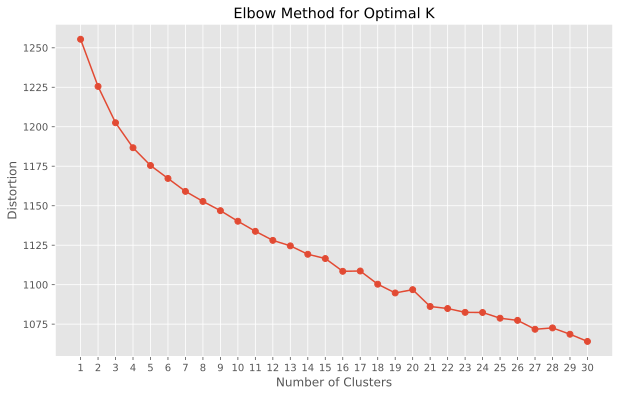

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Assuming you have already computed tfidf_features_reduced and have a DataFrame 'df' containing your data

# Apply K-Means clustering with Elbow Method
distortions = []
max_clusters = 30  # Maximum number of clusters to consider

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=400)
    kmeans.fit(tfidf_features_reduced)
    distortions.append(kmeans.inertia_)

# Plot Elbow Method curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()




In [ ]:
# Choose the optimal number of clusters based on the Elbow Method
optimal_k = 16  # Assuming the optimal number of clusters is 5 based on the Elbow Method
# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(tfidf_features_reduced)
# Get the cluster labels
cluster_labels = kmeans.labels_
# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(tfidf_features_reduced, cluster_labels)
print(f"Silhouette Score: {silhouette}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(tfidf_features_reduced, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.026219904154234835
Davies-Bouldin Index: 4.9101509932479885


In [ ]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN with parameters
dbscan = DBSCAN(eps=1, min_samples=10)

# Fit DBSCAN to TF-IDF features
dbscan.fit(tfidf_features_reduced)

# Get the cluster labels
cluster_labels_1 = dbscan.labels_

# Add cluster labels to the DataFrame
# df['DB_cluster'] = cluster_labels_1


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(tfidf_features_reduced, cluster_labels_1)
print(f"Silhouette Score: {silhouette}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(tfidf_features_reduced, cluster_labels_1)
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: -0.008425072491723059
Davies-Bouldin Index: 5.2424066400924705


In [ ]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,stemmed_and_lemmatized_text,clean_text,cluster,DB_cluster
4952,ec10ff5f29f51a24b59105e8784612b65bc622c5,10.1016/j.bbrc.2011.09.109,Lipid rafts play an important role in the life...,Lipid rafts are lipid microdomains enriched in...,"Huang, Li. Zhang, Yuan-peng. Yu, Ya-ling. ...",Role of lipid rafts in porcine reproductive a...,Biochemical and Biophysical Research Communica...,Lipid rafts play an important role in the lif...,l i p i d r a f t a r e l i p i d m i ...,lipid raft lipid microdomain enrich cholestero...,4,0
2796,8053681913fd4f6115645624eda127b533532e1b,10.1016/s0195-6701(07)60014-0,Negative-pressure isolation rooms are required...,Summary Negative-pressure isolation rooms are ...,"Walker, J. T.. Hoffman, P.. Bennett, A. M.....",Hospital and community acquired infection and...,Journal of Hospital Infection,Negative-pressure isolation rooms are<br>requ...,s u m m a r i n e g a t i v e - p r e s s u ...,summari negativepressur isol room requir hous ...,15,0
4029,8754fd8ba9ea4c34de61b3b5c97d6f13ffbdd647,10.1021/acs.est.0c02172,,W e read with great interest the Viewpoint by ...,"Murakami, Michio. Hata, Akihiko. Honda, Ryo...",Letter to the Editor: Wastewater-Based<br>Epi...,Environ Sci Technol,Not provided.,w e r e a d w i t h g r e a t i n t ...,w e read great interest viewpoint mao paperbas...,10,0
3408,3fdc836e508e8ec3b6cd0de4f95e66847087b607,10.1016/j.jaci.2006.11.003,Background: Rhinovirus-induced early wheezing ...,Acute wheezing affects one third of young chil...,"Lehtinen, Pasi. Ruohola, Aino. Vanto, Timo....",Prednisolone reduces recurrent wheezing<br>af...,Journal of Allergy and Clinical Immunology,Background: Rhinovirus-induced early<br>wheez...,a c u t w h e e z a f f e c t o n e t ...,acut wheez affect one third young children hal...,0,0
5140,16283e25f01d47898ad2b82d56bd81d5ccf44a5d,10.1186/1297-9716-43-41,The feline infectious peritonitis virus (FIPV)...,Coronaviruses are single-stranded RNA viruses ...,"Tanaka, Yoshikazu. Sato, Yuka. Osawa,<br>Sh...",Suppression of feline coronavirus<br>replicat...,Vet Res,The feline infectious peritonitis virus<br>(F...,c o r o n a v i r u s a r e s i n g l e - ...,coronavirus singlestrand rna virus general cau...,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7061,2c9a3072e8533ac8c5a74abfc595966d516a7878,10.3389/fmicb.2017.02110,"Viruses can be classified into archaeoviruses,...","Depending on the nature of the infected host, ...","Malik, Shahana S.. Azem-e-Zahra, Syeda. Kim...",Do Viruses Exchange Genes across<br>Superking...,Front Microbiol,Viruses can be classified into<br>archaeoviru...,d e p e n d o n t h e n a t u r o f ...,depend natur infect host virus broad classifi ...,13,0
4894,03d0fad6e48fb005f164fee1177d1cb1e17662e6,10.1002/psb.285,Lower respiratory tract infections comprise a ...,L ower respiratory tract infections (LRTIs) co...,"Meisner, Sarah",Recommended management of lower respiratory<b...,,Lower respiratory tract infections comprise a...,l o w e r r e s p i r a t o r i t r a c ...,l ower respiratori tract infect lrtis cover br...,8,0
9404,04f1b43c6ef8264b9bccf475299756ed3018b1fb,10.3906/sag-2004-168,,recover and severe cases (approximately 15%) t...,"TUFAN, Abdurrahman. AVANOĞLU GÜLER, Aslıhan....","COVID-19, immune system response,<br>hyperinf...",Turk J Med Sci,Not provided.,r e c o v a n d s e v e r c a s e ( ...,recov sever case approxim develop multi organ ...,10,0
4663,3c440b07b2bc59e8483537e994bbd7ac0030801a,10.1371/journal.pone.0082176,The establishment of persistent viral infectio...,The families Coronaviridae (Coronavirus and To...,"Ke, Ting-Yung. Liao, Wei-Yu. Wu, Hung-Yi",A Leaderless Genome Identified during<br>Pers...,PLoS One,The establishment of persistent viral<br>infe...,t h e f a m i l i c o r o n a v i r i d a ...,famili coronavirida coronavirus torovirus gene...,2,0


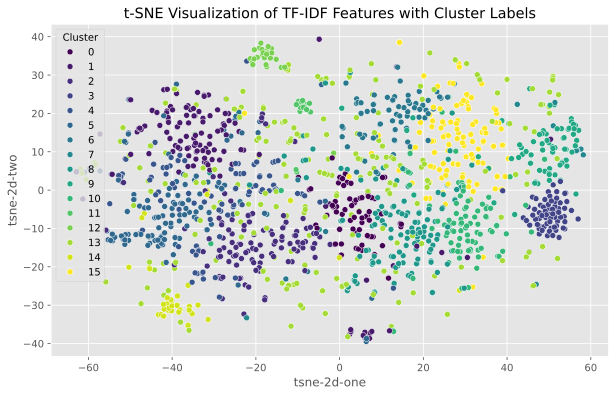

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Apply t-SNE to reduce the dimensionality of TF-IDF features to 2D
tsne = TSNE(n_components=2, random_state=42)
tfidf_features_2d = tsne.fit_transform(tfidf_features_dense)

# Convert the 2D features to DataFrame
tfidf_features_2d_df = pd.DataFrame(tfidf_features_2d, columns=['tsne-2d-one', 'tsne-2d-two'])
df['tsne-2d-one'] = tfidf_features_2d_df['tsne-2d-one']
df['tsne-2d-two'] = tfidf_features_2d_df['tsne-2d-two']
# Add cluster labels to the DataFrame
tfidf_features_2d_df['cluster'] = cluster_labels

# Plot the scatterplot with different colors for different clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='cluster', data=tfidf_features_2d_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization of TF-IDF Features with Cluster Labels')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Number of topics to extract (can be adjusted)
num_topics = 5

# Initialize LDA model
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA model to TF-IDF features
lda.fit(tfidf_features_dense)

# Get the top words for each topic
def get_top_words(lda_model, feature_names, num_words=10):
    top_words = []
    for topic_weights in lda_model.components_:
        top_word_indices = topic_weights.argsort()[-num_words:][::-1]
        top_words.append([feature_names[i] for i in top_word_indices])
    return top_words

# Get feature names from TfidfVectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print top words for each topic in each cluster
for cluster_id in range(optimal_k):  # assuming optimal_k is the number of clusters
    print(f"Cluster {cluster_id + 1}:")
    cluster_tfidf_features = tfidf_features_dense[df['cluster'] == cluster_id]
    lda.fit(cluster_tfidf_features)
    top_words = get_top_words(lda, feature_names)
    for i, words in enumerate(top_words):
        print(f"Topic {i + 1}: {', '.join(words)}")
    print()


Cluster 1:
Topic 1: tcid, mef, passeng, ntr, plasmid, spin, roch, covari, qpcr, sas
Topic 2: tcid, mef, passeng, ntr, plasmid, spin, roch, covari, qpcr, sas
Topic 3: children, virus, infect, influenza, rsv, respiratori, patient, pneumonia, studi, case
Topic 4: tcid, mef, passeng, ntr, plasmid, spin, roch, covari, qpcr, sas
Topic 5: tcid, mef, passeng, ntr, plasmid, spin, roch, covari, qpcr, sas

Cluster 2:
Topic 1: lncrnas, rbd, revert, apelin, nasopharyng, pairwis, dish, adam, bronchoscopi, tokyo
Topic 2: lncrnas, cis, utr, noncod, rnas, outdoor, neighbor, nest, enforc, pol
Topic 3: cell, mice, express, immun, respons, activ, infect, ace, lung, cytokin
Topic 4: lncrnas, rbd, revert, apelin, nasopharyng, pairwis, dish, adam, bronchoscopi, tokyo
Topic 5: lncrnas, rbd, revert, apelin, nasopharyng, pairwis, dish, adam, bronchoscopi, tokyo

Cluster 3:
Topic 1: sirna, appendix, mainland, knockdown, stream, organell, rnai, silenc, mab, languag
Topic 2: sirna, pdcov, knockdown, rnai, silenc, 

In [ ]:
import plotly.express as px

def interactive_plot(df):
    clusters = sorted(df['cluster'].unique())

    # Generate distinct colors for each cluster using Plotly's colors
    colors = px.colors.qualitative.Plotly

    # Create a scatter plot for each cluster with a unique color
    data = []
    for i, cluster in enumerate(clusters):
        cluster_data = df[df['cluster'] == cluster]
        scatter = go.Scatter(
            x=cluster_data['tsne-2d-one'],
            y=cluster_data['tsne-2d-two'],
            mode='markers',
            name=f'Cluster {cluster}',
            text=cluster_data['title'],
            hoverinfo='text',
            marker=dict(size=10, color=colors[i % len(colors)]),  # Assign a unique color
            visible=False  # Initially, make all traces invisible
        )
        data.append(scatter)

    # Add a scatter plot for all clusters with different colors
    scatter_all = go.Scatter(
        x=df['tsne-2d-one'],
        y=df['tsne-2d-two'],
        mode='markers',
        name='All Clusters',
        text=df['title'],
        hoverinfo='text',
        marker=dict(size=10, color=df['cluster'].map(lambda x: colors[x % len(colors)])),  # Assign colors by cluster
        visible=True  # Initially, show all clusters
    )
    data.append(scatter_all)

    x_min = df['tsne-2d-one'].min()
    x_max = df['tsne-2d-one'].max()
    y_min = df['tsne-2d-two'].min()
    y_max = df['tsne-2d-two'].max()

    # Initialize the figure
    fig = go.Figure(data=data)

    # Ensure square aspect ratio
    fig.update_layout(
        title='Cluster Visualization',
        xaxis=dict(title='t-SNE 1', range=[x_min, x_max]),  # Ensure x and y axes are equal
        yaxis=dict(title='t-SNE 2', range=[y_min, y_max]),
        width=1000,
        height=700  # Ensure the figure is square-shaped
    )

    # Add hover functionality
    fig.update_traces(
        hoverinfo='text',
        marker=dict(opacity=0.7, size=8),
    )

    # Add interactive slider for cluster selection
    steps = []
    for i, cluster in enumerate(clusters):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(clusters) + [False]},  # Hide all clusters
                {'title': f'Cluster {cluster}'}],
            label=f'Cluster {cluster}'
        )
        # Only make the current cluster visible
        step['args'][0]['visible'][i] = True
        steps.append(step)

    # Add final step for all clusters
    steps.append(dict(
        method='update',
        args=[{'visible': [False] * len(clusters) + [True]},  # Only show the 'all clusters' trace
            {'title': 'All Clusters'}],
        label='All Clusters'
    ))

    sliders = [dict(
        active=len(steps) - 1,
        currentvalue={"prefix": "Cluster: "},
        pad={"t": 50},
        steps=steps
    )]

    fig.update_layout(
        sliders=sliders
    )

    # Display the plot
    fig.show()

In [ ]:
import plotly.graph_objs as go

# Assuming you have a DataFrame 'df' containing your data, and it has columns 'tsne-2d-one', 'tsne-2d-two', 'y', and 'title'
tfidf_features_2d_df['title']=df['title']
# Call the interactive_plot function with your DataFrame as input
interactive_plot(tfidf_features_2d_df)
